<a href="https://colab.research.google.com/github/blenbk/Economic-modelling/blob/main/Final%20group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.7 MB/s eta 0:00:00



Let's take a survey! 
Student Name: Blen
Accommodation: Hotel
Food Preference: Pizza
Activity Preference: Swimming
Transportation Mode: Car
Destination: Rome


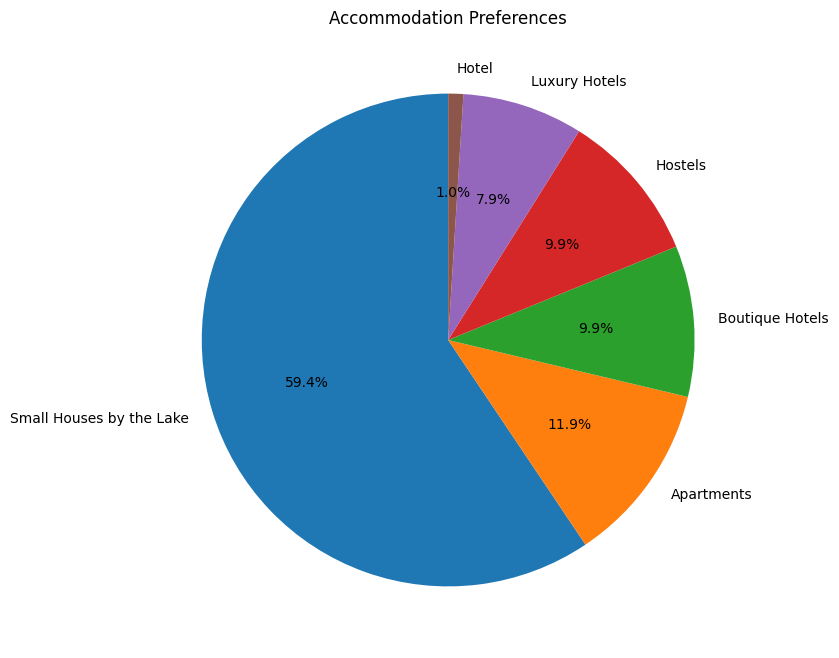

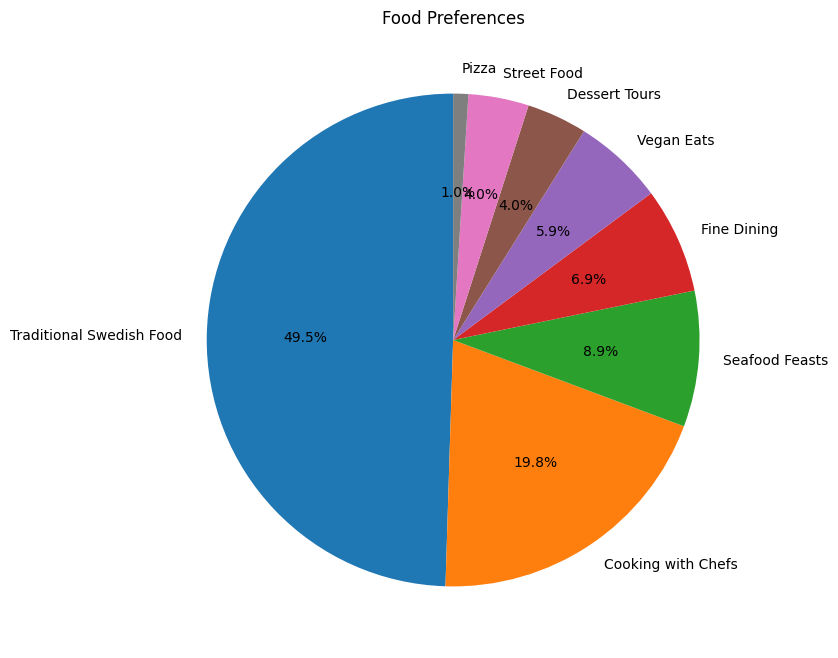

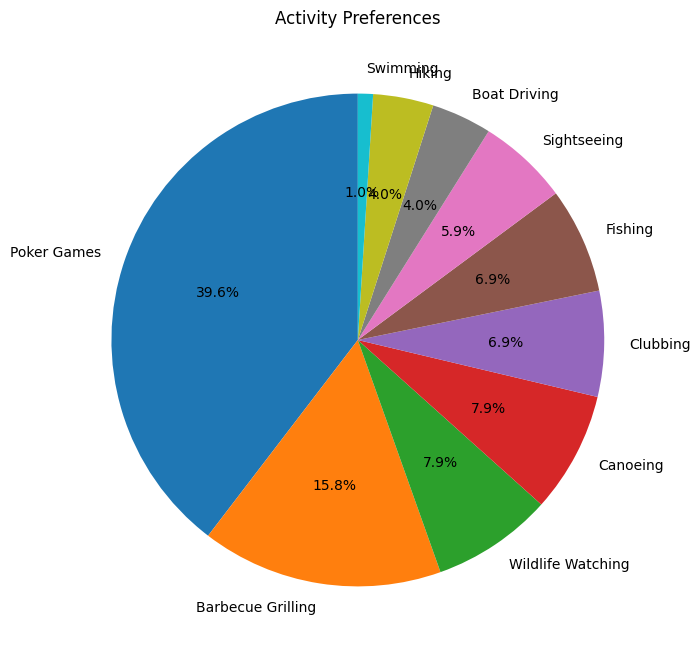

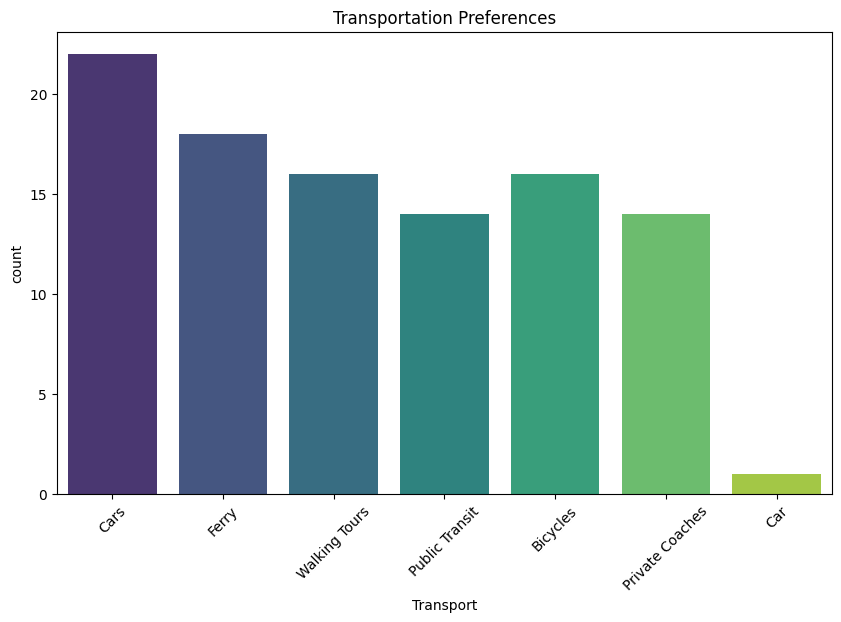


Additional Analysis of Preferences:
- Most popular destinations:
Destination
Mountain Resort in Switzerland    25
City Tour in Italy                23
Beachside Villa in Greece         19
Safari in Kenya                   18
Ski Lodge in Canada               15
Name: count, dtype: int64
- Most common accommodation types:
Accommodation
Small Houses by the Lake    60
Apartments                  12
Boutique Hotels             10
Hostels                     10
Luxury Hotels                8
Name: count, dtype: int64
- Most favored activities:
Activity
Poker Games          40
Barbecue Grilling    16
Wildlife Watching     8
Canoeing              8
Clubbing              7
Name: count, dtype: int64
- Most preferred foods:
Food
Traditional Swedish Food    50
Cooking with Chefs          20
Seafood Feasts               9
Fine Dining                  7
Vegan Eats                   6
Name: count, dtype: int64
Finalized trip details:
- Destination: Small Town by a Lake in Sweden
- Duration: 5 days


Mean Squared Error: 2.4628237460999988e-28
R-squared: 1.0


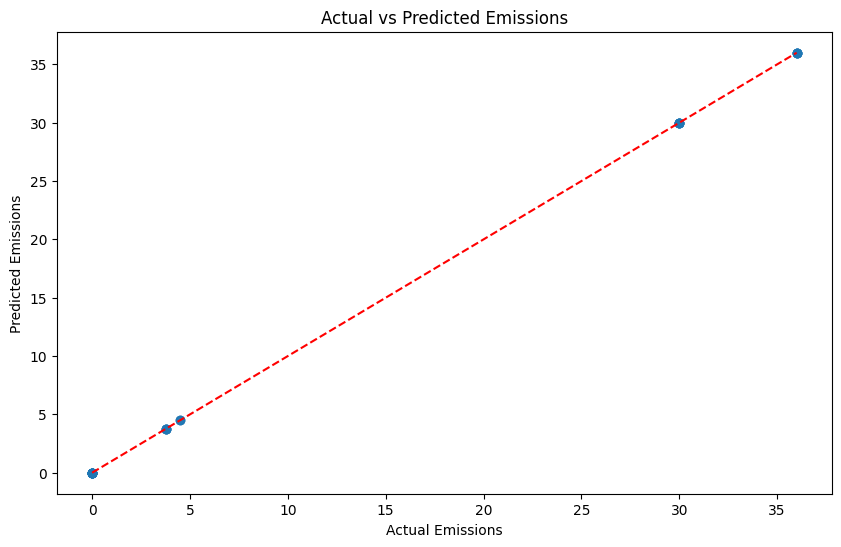

In [2]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd
import pandas as pd
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Faker for generating random names
fake = Faker()


def generate_data(num_students=50, destinations=None):
    if destinations is None:
        destinations = ['Small Town by a Lake in Sweden', 'Mountain Resort in Switzerland',
                        'Beachside Villa in Greece', 'City Tour in Italy', 'Safari in Kenya']

    # Enforcing controlled randomness for preferences
    accommodations = ['Small Houses by the Lake'] * int(num_students * 0.6) + \
                     np.random.choice(['Luxury Hotels', 'Hostels', 'Boutique Hotels', 'Apartments'],
                                      size=int(num_students * 0.4), replace=True).tolist()
    np.random.shuffle(accommodations)

    foods = ['Traditional Swedish Food'] * int(num_students * 0.5) + \
            ['Cooking with Chefs'] * int(num_students * 0.2) + \
            np.random.choice(['Street Food', 'Fine Dining', 'Seafood Feasts', 'Vegan Eats', 'Dessert Tours'],
                             size=num_students - int(num_students * 0.7), replace=True).tolist()
    np.random.shuffle(foods)

    activities = ['Poker Games'] * int(num_students * 0.4) + \
                 np.random.choice(['Fishing', 'Barbecue Grilling', 'Boat Driving', 'Hiking', 'Wildlife Watching',
                                   'Canoeing', 'Sightseeing', 'Clubbing'],
                                  size=num_students - int(num_students * 0.4), replace=True).tolist()
    np.random.shuffle(activities)

    transports = np.random.choice(['Cars', 'Ferry', 'Bicycles', 'Walking Tours', 'Public Transit', 'Private Coaches'],
                                  num_students, replace=True)

    data = {
        'Student': [fake.unique.first_name() for _ in range(num_students)],
        'Accommodation': accommodations,
        'Food': foods,
        'Activity': activities,
        'Transport': transports,
        'Destination': np.random.choice(destinations, num_students)
    }
    return pd.DataFrame(data)


df = generate_data()


# Visualization of data
def visualize_data(df):
    # Pie charts for accommodations and food preferences
    for category in ['Accommodation', 'Food', 'Activity']:
        plt.figure(figsize=(8, 8))
        counts = df[category].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        plt.title(f'{category} Preferences')
        plt.show()

    # Bar chart for transportation preferences
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='Transport', hue='Transport', palette='viridis', legend=False)
    plt.title('Transportation Preferences')
    plt.xticks(rotation=45)
    plt.show()


def analyze_preferences(df):
    # Additional analysis of preferences
    print("\nAdditional Analysis of Preferences:")
    print("- Most popular destinations:")
    print(df['Destination'].value_counts().head())
    print("- Most common accommodation types:")
    print(df['Accommodation'].value_counts().head())
    print("- Most favored activities:")
    print(df['Activity'].value_counts().head())
    print("- Most preferred foods:")
    print(df['Food'].value_counts().head())


# generating the initial data
df = generate_data(num_students=100, destinations=['Mountain Resort in Switzerland', 'Beachside Villa in Greece',
                                                   'City Tour in Italy', 'Safari in Kenya', 'Ski Lodge in Canada'])
def visualize_data_interactive(df):
    fig.show()

    # Transportation Preferences as a bar chart using Plotly
    transport_fig = go.Figure(data=[
        go.Bar(x=df['Transport'].value_counts().index, y=df['Transport'].value_counts().values)
    ])
    transport_fig.update_layout(title='Transportation Preferences', xaxis_title='Transport', yaxis_title='Count')
    transport_fig.show()

    image_fig = go.Figure()
    image_fig.add_layout_image(
        dict(
            source="https://path_to_your_image/IE_GOES_SWEDEN_2024.png",
            xref="paper", yref="paper",
            x=0.5, y=0.5,
            sizex=0.5, sizey=0.5,
            xanchor="center", yanchor="middle"
        )
    )
    image_fig.update_layout(
        title="IE GOES SWEDEN 2024",
        xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
        yaxis=dict(showgrid=False, showticklabels=False, zeroline=False)
    )
    image_fig.show()


def add_survey_row(df):
    print("\nLet's take a survey! ")
    student_name = input("Student Name: ")
    accommodation = input("Accommodation: ")
    food = input("Food Preference: ")
    activity = input("Activity Preference: ")
    transport = input("Transportation Mode: ")
    destination = input("Destination: ")

    # Append new row to DataFrame
    new_row = pd.DataFrame({
        'Student': [student_name],
        'Accommodation': [accommodation],
        'Food': [food],
        'Activity': [activity],
        'Transport': [transport],
        'Destination': [destination]
    })
    new_df = pd.concat([df, new_row], ignore_index=True)
    return new_df

# add survey row
new_df = add_survey_row(df)

# visualize updated data
visualize_data(new_df)

# analyze updated data
analyze_preferences(new_df)

# Final trip solution based on the preferences
print("Finalized trip details:")
print("- Destination: Small Town by a Lake in Sweden")
print("- Duration: 5 days")
print("- Activities: Fishing, Barbecue Grilling, Boat Driving, Sightseeing, Clubbing, and Poker Games")
print("- Accommodation: Small Houses next to the Lake")
print("- Transportation: Mainly Cars, with arrival via Ferry")
print("- Food: A mix of Traditional Swedish Food, Taco Evening, and Cooking with Chefs")

import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Sample data generation function, to be replaced with your actual data generation logic
def generate_data(num_students=100):
    np.random.seed(0)  # For reproducibility
    transports = np.random.choice(['Cars', 'Ferry', 'Bicycles', 'Walking Tours', 'Public Transit', 'Private Coaches'],
                                  num_students, replace=True)
    destinations = np.random.choice(['Sweden', 'Switzerland', 'Greece', 'Italy', 'Kenya'], num_students)
    data = {'Transport': transports, 'Destination': destinations}
    return pd.DataFrame(data)


import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots


def generate_data(num_students=100):
    np.random.seed(0)  # For reproducibility
    transports = np.random.choice(['Cars', 'Ferry', 'Bicycles', 'Walking Tours', 'Public Transit', 'Vespa'],
                                  num_students, replace=True)
    genders = np.random.choice(['Male', 'Female'], num_students)
    destinations = np.random.choice(['Sweden', 'Switzerland', 'Greece', 'Italy', 'Kenya'], num_students)
    data = {'Gender': genders, 'Transport': transports, 'Destination': destinations}
    return pd.DataFrame(data)


def calculate_emissions(df):
    emission_factors = {'Cars': 150, 'Ferry': 120, 'Bicycles': 0, 'Walking Tours': 0, 'Public Transit': 75, 'Vespa': 90}
    average_distances = {'Cars': 200, 'Ferry': 300, 'Bicycles': 15, 'Walking Tours': 5, 'Public Transit': 50,
                         'Vespa': 50}
    df['Emission'] = df['Transport'].map(emission_factors) * df['Transport'].map(average_distances) / 1000  # kg CO2
    return df


def visualize_emissions(df):
    emissions_summary = df.groupby('Transport').agg({'Emission': 'sum'}).reset_index()
    fig = go.Figure(data=[go.Bar(x=emissions_summary['Transport'], y=emissions_summary['Emission'])])
    fig.update_layout(title="CO2 Emissions by Transportation Mode (kg CO2)",
                      xaxis_title="Transportation Mode",
                      yaxis_title="Total Emissions (kg CO2)")
    fig.show()


def visualize_voting_by_gender():
    votes = {
        'Female': {'Vespa': 5, 'Public Transit': 3, 'Walking Tours': 5, 'Ferry': 2, 'Bicycles': 10, 'Cars': 10},
        'Male': {'Cars': 5, 'Ferry': 5, 'Bicycles': 10, 'Walking Tours': 2, 'Vespa': 3}
    }

    fig = make_subplots(rows=1, cols=2, subplot_titles=["Female Votes For Transportation", "Male Votes For Transportation"])
    for i, (gender, data) in enumerate(votes.items(), 1):
        transports = list(data.keys())
        counts = list(data.values())
        fig.add_trace(go.Bar(x=transports, y=counts, name=f"{gender} Votes"), row=1, col=i)

    fig.update_layout(title_text="Voting Preferences by Gender considerng the CO2 Emissions", barmode='group')
    fig.show()

# Linear Regression to Predict Emissions
def perform_regression(df):
    # Ensure 'Emission' column is calculated
    if 'Emission' not in df.columns:
        df = calculate_emissions(df)

    # Encode categorical variables
    df_encoded = pd.get_dummies(df, columns=['Transport'], drop_first=True)

    # Ensure 'Gender' and 'Destination' are in the dataframe for the drop function
    df_encoded['Gender'] = np.random.choice(['Male', 'Female'], df_encoded.shape[0])
    df_encoded['Destination'] = np.random.choice(['Sweden', 'Switzerland', 'Greece', 'Italy', 'Kenya'], df_encoded.shape[0])

    # Define features and target variable
    X = df_encoded.drop(['Emission', 'Gender', 'Destination'], axis=1)
    y = df_encoded['Emission']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')

    # Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel('Actual Emissions')
    plt.ylabel('Predicted Emissions')
    plt.title('Actual vs Predicted Emissions')
    plt.show()

# Generate, calculate and visualize
df = generate_data(num_students=200)  # Larger sample for better distribution
df = calculate_emissions(df)
visualize_emissions(df)
visualize_voting_by_gender()
perform_regression(df)

# Generate, calculate and visualize
df = generate_data(num_students=200)  # Larger sample for better distribution
df = calculate_emissions(df)
visualize_emissions(df)
visualize_voting_by_gender()
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots